#### opencv로 같은 크기의 이미지 블렌딩 실험

In [41]:
import cv2
import matplotlib.pyplot as plt

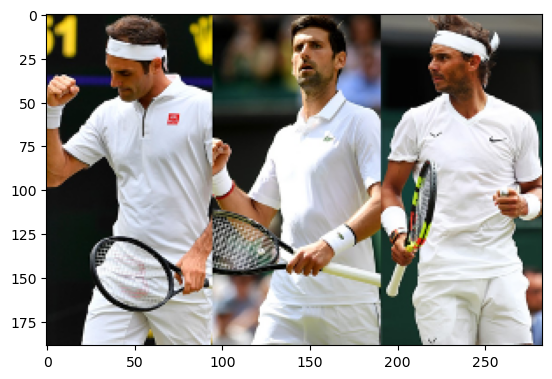

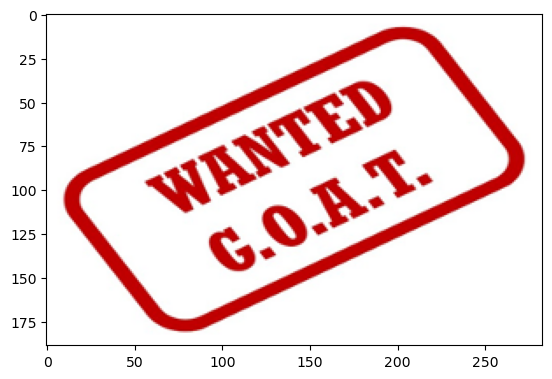

In [42]:
sample_img = cv2.imread('../99_Studyfile/02_Sample/ex_image.png')
sample_logo = cv2.imread('../99_Studyfile/02_Sample/ex_image_logo.png')

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.show()

plt.imshow(sample_logo)
plt.show()

#### 이미지 크기 수정

(600, 800, 3) (600, 800, 3)


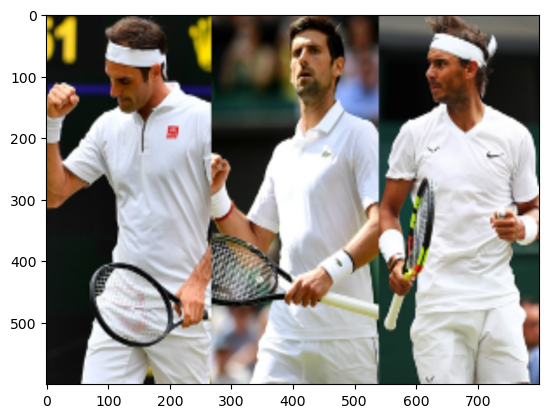

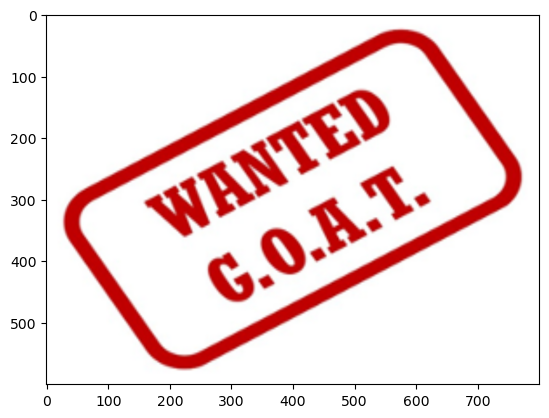

In [8]:
img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

print(img1.shape, img2.shape)

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

#### 이미지 혼합 실습

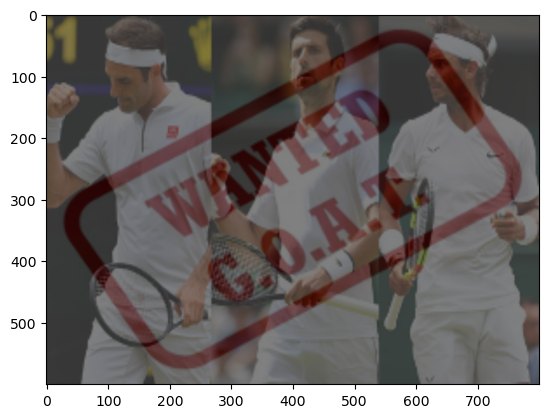

In [9]:
blended = cv2.addWeighted(img1, 0.3, img2, 0.2, 0)

plt.imshow(blended)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

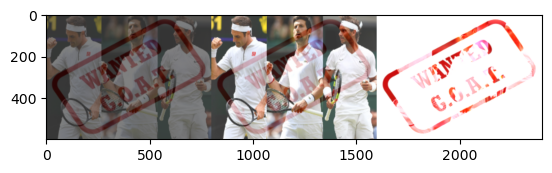

In [17]:
import numpy as np

blended = np.hstack([
    cv2.addWeighted(img1, 0.3, img2, 0.2, 0),
    cv2.addWeighted(img1, 0.8, img2, 0.2, 0),
    cv2.addWeighted(img1, 1.0, img2, 1.0, 0)
])
plt.imshow(blended)
plt.show

##### 비트연산

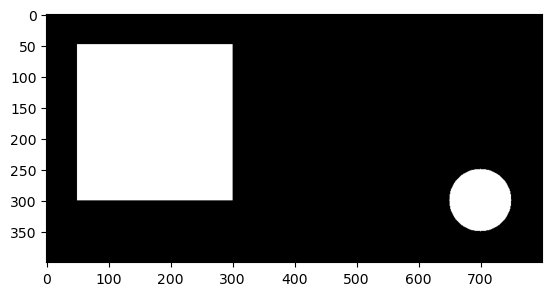

In [26]:
import numpy as np

# 사각형 임시 데이터 생성
img_rectangle = np.ones((400,400), dtype='uint8')
cv2.rectangle(img_rectangle, (50,50), (300,300), (255,255), -1)

# 원 임시 데이터 생성
img_circle = np.ones((400,400), dtype='uint8')
cv2.circle(img_circle, (300,300), 50, (255,255,255), -1)

com_temp_img =np.hstack([
    img_rectangle,img_circle
])
plt.imshow(com_temp_img, 'gray')
plt.show()

#### A data, B data 가지고 and, or, xor, not (A:직사각형 B:원형)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


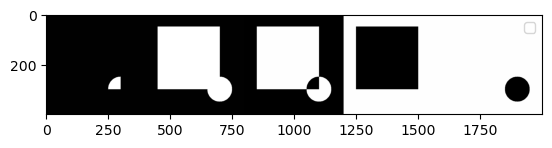

In [34]:
# and (A,B)
bitwiseAnd = cv2.bitwise_and(img_rectangle,img_circle)

# or (A,B)
bitwiseOr = cv2.bitwise_or(img_rectangle,img_circle)

# xor (A,B)
bitwiseXor = cv2.bitwise_xor(img_rectangle,img_circle)

# not (A)
bitwiseNot_rec = cv2.bitwise_not(img_rectangle)

# not (B)
bitwiseNot_cir = cv2.bitwise_not(img_circle)

# Combined
com_func_img =np.hstack([
    bitwiseAnd, bitwiseOr, bitwiseXor, bitwiseNot_rec, bitwiseNot_cir
])
plt.imshow(com_func_img, 'gray')
plt.legend()
plt.show()

##### 마스킹 실습

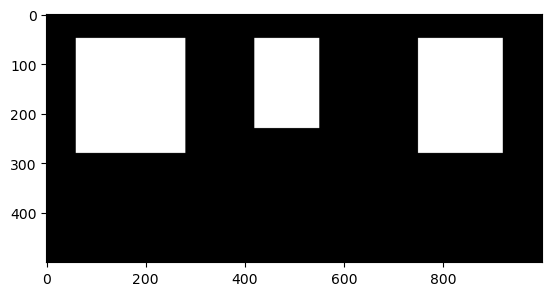

In [39]:
img_rectangle_temp = np.ones((500,1000), dtype='uint8')
mask_ = np.zeros(img_rectangle_temp.shape, dtype='uint8')

# 직사각형 안에 흰색 직사각형 추가
cv2.rectangle(mask_, (60,50), (280,280), (255,255), -1)
cv2.rectangle(mask_, (420,50), (550,230), (255,255), -1)
cv2.rectangle(mask_, (750,50), (920,280), (255,255), -1)

plt.imshow(mask_, 'gray')
plt.show()